# US Airlines Tweet Sentiment Analysis Using SVMs

**DATE**:- 20-05-2024    
**Model Name**:- Tweet Sentiment Analysis Model   
**Dataset**:- https://www.kaggle.com/datasets/bansodesandeep/us-airline-data  
**Author**:- Supriyo Chowdhury    
**License**:- MIT    
**Language**:- Python 3.11.5    

We have been given a data of the Tweets by customers of US Airlines with sentiments. The task is to do sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

We will be using Support vector Machines for performing the sentiment Analysis. 

## Support Vector Machines:-
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane.


We will use different Natural Language Processing techniques and data visulization techniques so that we can easily fit the data into the SVM model.

## Understanding the Dataset

We will open the dataset and see how data is arranged in the dataset

In [106]:
## IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import re
import nltk
import os
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [107]:
tweet_df = pd.read_csv(r'Datasets/Tweets.csv/Tweets.csv')

tweet_df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703061e+17           neutral                        1.0000   
1  5.703011e+17          positive                        0.3486   
2  5.703011e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703008e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [108]:
#Getting the shape
tweet_df.shape

(14640, 15)

In [109]:
#Getting the columns
tweet_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [110]:
#Checking the info of our data
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [111]:
#Checking describe values
tweet_df.describe()

tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791111e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000

In [112]:
#Checking unique values
tweet_df.nunique()

tweet_id                        14484
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3022
user_timezone                      85
dtype: int64

In [113]:
#Checking for null values
tweet_df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## Feature Engineering with Exploratory Data Analysis (EDA)

Here we will take one by one features into consideration and perform Feature Engineering so that we can fit the data into the model. Also we will perform EDA for these features which are important.

In [114]:
#Checking the info of our data
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Here we can see for fields like **airline_sentiment_gold**,**negativereason_gold**, and **tweet_coord** has a very less number of null values. Lets see how many null values they have.

In [115]:
#Checking for null values
tweet_df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

As we can clearly see for these three features the amount of null value is quite high. We can also see the percentage of null values in these.


In [116]:
(tweet_df.isnull().sum() *100 / tweet_df.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

Here we can clearly see, that the three above mentioned fields have almost 93-99% of null values. Hence it won't make sense to consider them in the main dataset as they contribute the least to it.

So we will delete these fields from the dataset

In [117]:
#Before dropping or making any changes we will keep a copy reference of the data frame
copy_tweet_df = tweet_df.copy()
copy_tweet_df

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      5.703061e+17           neutral                        1.0000   
1      5.703011e+17          positive                        0.3486   
2      5.703011e+17           neutral                        0.6837   
3      5.703010e+17          negative                        1.0000   
4      5.703008e+17          negative                        1.0000   
...             ...               ...                           ...   
14635  5.695877e+17          positive                        0.3487   
14636  5.695874e+17          negative                        1.0000   
14637  5.695872e+17           neutral                        1.0000   
14638  5.695872e+17          negative                        1.0000   
14639  5.695871e+17           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
0                  0                @VirginAmerica What @dhepburn said.   
1                  0  @VirginAmerica plus you've added commercials t...   
2                  0  @VirginAmerica I didn't today... Must mean I n...   
3                  0  @VirginAmerica it's really aggressive to blast...   
4                  0  @VirginAmerica and it's a really big bad thing...   
...              ...                                                ...   
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
0             NaN  2015-02-24 11:35:52 -0800            NaN   
1             NaN  2015-02-24 11:15:59 -0800            NaN   
2             NaN  2015-02-24 11:15:48 -0800      Lets Play   
3             NaN  2015-02-24 11:15:36 -0800            NaN   
4             NaN  2015-02-24 11:14:45 -0800            NaN   
...           ...                        ...            ...   
14635         NaN  2015-02-22 12:01:01 -0800            NaN   
14636      

In [118]:
#Dropping the three fields airline_sentiment_gold, negativereason_gold, tweet_coord 

tweet_df = tweet_df.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],axis=1)
tweet_df

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      5.703061e+17           neutral                        1.0000   
1      5.703011e+17          positive                        0.3486   
2      5.703011e+17           neutral                        0.6837   
3      5.703010e+17          negative                        1.0000   
4      5.703008e+17          negative                        1.0000   
...             ...               ...                           ...   
14635  5.695877e+17          positive                        0.3487   
14636  5.695874e+17          negative                        1.0000   
14637  5.695872e+17           neutral                        1.0000   
14638  5.695872e+17          negative                        1.0000   
14639  5.695871e+17           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

                  name  retweet_count  \
0              cairdin              0   
1             jnardino              0   
2           yvonnalynn              0   
3             jnardino              0   
4             jnardino              0   
...                ...            ...   
14635  KristenReenders              0   
14636         itsropes              0   
14637         sanyabun              0   
14638       SraJackson              0   
14639        daviddtwu              0   

                                                    text  \
0                    @VirginAmerica What @dhepburn said.   
1      @VirginAmerica plus you've added commercials t...   
2      @VirginAmerica I didn't today... Must mean I n...   
3      @VirginAmerica it's really aggressive to blast...   
4      @VirginAmerica and it's a really big bad thing...   
...                                                  ...   
14635  @AmericanAir thank you we got on a different f...   
14636  @AmericanAir leaving over 20 minutes Late Flig...   
14637  @AmericanAir Please bring American Airlines to...   
14638  @AmericanAir you have my money, you change my ...   
14639  @AmericanAir we have 8 ppl so we need 2 know h...   

                   tweet_created tweet_location               user_timezone  
0      2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1      2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2      2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3      2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4      2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)  
...                          ...            ...                         ...  
14635  2015-02-22 12:01:01 -0800            NaN                         NaN  
14636  2015-02-22 11:59:46 -0800          Texas                         NaN  
14637  2015-02-22 11:59:15 -0800  Nigeria,lagos                         NaN  
14638  2015-02-22 11:59:02 -0800     New Jersey  Eastern Time (US & Canada)  
14639  2015-02-22 11:58:51 -0800     dallas, TX                         NaN  

[14640 rows x 12 columns]

In [119]:
#Lookign at the columns
tweet_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [120]:
tweet_df.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

In [121]:
tweet_df.shape

(14640, 12)

In [122]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.3+ MB


As here we can see a lot of Object data so we will divide the dataset into two data parts i.e. 
1. Categorical Data
2. Numerical Data

### Dividing the Data into Categorical Data

In [123]:
categorical_data = [var for var in tweet_df.columns if tweet_df[var].dtype == 'O' ]
categorical_data

['airline_sentiment',
 'negativereason',
 'airline',
 'name',
 'text',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [124]:
numerical_data = [var for var in tweet_df.columns if tweet_df[var].dtype != 'O' ]
numerical_data

['tweet_id',
 'airline_sentiment_confidence',
 'negativereason_confidence',
 'retweet_count']

In [125]:
#Lets see the Categorical Data
tweet_df[categorical_data].head()

airline_sentiment negativereason         airline        name  \
0           neutral            NaN  Virgin America     cairdin   
1          positive            NaN  Virgin America    jnardino   
2           neutral            NaN  Virgin America  yvonnalynn   
3          negative     Bad Flight  Virgin America    jnardino   
4          negative     Can't Tell  Virgin America    jnardino   

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

Now Lets work on each Categorical Data

### Feature Engineering of "tweet_created" Feature

In the tweet created feature we can see its in object, so we will convert it into a datetime format

In [126]:
#Getting Minimum value
tweet_df['tweet_created'].min()

'2015-02-16 23:36:05 -0800'

In [127]:
#Getting Maximum value
tweet_df['tweet_created'].max()

'2015-02-24 11:53:37 -0800'

Here we can see the value is between 16th Deb 2015 to 24th Feb 2015, i.e. 9 days of data. Hence we will convert it into date time format

In [128]:
tweet_df['tweet_created'] = pd.to_datetime(tweet_df['tweet_created']).dt.date

In [129]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.3+ MB


In [130]:
tweet_df['tweet_created'] = pd.to_datetime(tweet_df['tweet_created'])

In [131]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  float64       
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   name                          14640 non-null  object        
 7   retweet_count                 14640 non-null  int64         
 8   text                          14640 non-null  object        
 9   tweet_created                 14640 non-null  datetime64[ns]
 10  tweet_location                9907 non-null   object        
 11  user_timezone               

In [132]:
tweet_df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703061e+17           neutral                        1.0000   
1  5.703011e+17          positive                        0.3486   
2  5.703011e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703008e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

  tweet_created tweet_location               user_timezone  
0    2015-02-24            NaN  Eastern Time (US & Canada)  
1    2015-02-24            NaN  Pacific Time (US & Canada)  
2    2015-02-24      Lets Play  Central Time (US & Canada)  
3    2015-02-24            NaN  Pacific Time (US & Canada)  
4    2015-02-24            NaN  Pacific Time (US & Canada)

Now we will see how the tweets dates are distributed.

In [133]:
nt = tweet_df.groupby('tweet_created').size()

In [134]:
nt

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

Lets check if there is any null value or not

In [135]:
tweet_df['tweet_created'].isnull().sum()

0

As there are no null values we can proceed to the next. If there was any we would have given the value of 22nd Feb as it has the most number of tweets.

In [136]:
categorical_data

['airline_sentiment',
 'negativereason',
 'airline',
 'name',
 'text',
 'tweet_created',
 'tweet_location',
 'user_timezone']

Now we need to convert this date field into integers

#### Feature Engineering of Date Field

As we have converted the strings into date field, now we can use a lot of date time features to extract the fields.
Here we will create different features named as year, month and date and add them in the data set

In [137]:
#Creating fields in the dataset
tweet_df['tweet_created_year'] = tweet_df['tweet_created'].dt.year
tweet_df['tweet_created_month'] = tweet_df['tweet_created'].dt.month
tweet_df['tweet_created_day'] = tweet_df['tweet_created'].dt.day

tweet_df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703061e+17           neutral                        1.0000   
1  5.703011e+17          positive                        0.3486   
2  5.703011e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703008e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

  tweet_created tweet_location               user_timezone  \
0    2015-02-24            NaN  Eastern Time (US & Canada)   
1    2015-02-24            NaN  Pacific Time (US & Canada)   
2    2015-02-24      Lets Play  Central Time (US & Canada)   
3    2015-02-24            NaN  Pacific Time (US & Canada)   
4    2015-02-24            NaN  Pacific Time (US & Canada)   

   tweet_created_year  tweet_created_month  tweet_created_day  
0                2015                    2                 24  
1                2015                    2                 24  
2                2015                    2                 24  
3                2015                    2                 24  
4                2015                    2                 24

In [138]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  float64       
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   name                          14640 non-null  object        
 7   retweet_count                 14640 non-null  int64         
 8   text                          14640 non-null  object        
 9   tweet_created                 14640 non-null  datetime64[ns]
 10  tweet_location                9907 non-null   object        
 11  user_timezone               

As we have captured the values into three different features, we can delete the main feature. 

In [139]:
#Delete the tweet_created feature
tweet_df = tweet_df.drop(['tweet_created'],axis=1)
tweet_df.columns.to_list()

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'name',
 'retweet_count',
 'text',
 'tweet_location',
 'user_timezone',
 'tweet_created_year',
 'tweet_created_month',
 'tweet_created_day']

In [140]:
categorical_data = [var for var in tweet_df.columns if tweet_df[var].dtype == 'O' ]
categorical_data

['airline_sentiment',
 'negativereason',
 'airline',
 'name',
 'text',
 'tweet_location',
 'user_timezone']

In [141]:
tweet_df['name'].value_counts()

name
JetBlueNews       63
kbosspotter       32
_mhertz           29
otisday           28
throthra          27
                  ..
ChrisJLeary        1
tracy_edes         1
NGottesman         1
chadlacalamita     1
sanyabun           1
Name: count, Length: 7701, dtype: int64

In [142]:
tweet_df['name'].nunique()

7701

### Feature Engineering of Airline Field

We will look how the Airline field is there in the dataset.

In [143]:
#Unique values in Airline field
tweet_df['airline'].nunique()

6

In [144]:
#Looking at the six values
tweet_df['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

In [145]:
#Looking at the six values
airline = tweet_df['airline'].unique()

Lets plot them and see the bar plots

Text(0.5, 1.0, 'Count of Airline Companies')

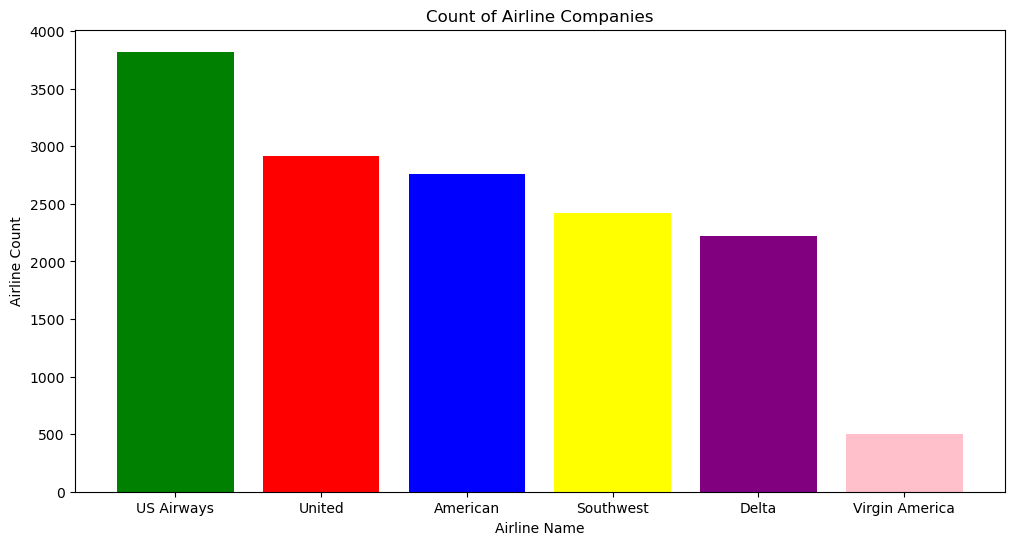

In [146]:
counter = tweet_df.airline.value_counts()
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
index = [1,2,3,4,5,6]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['green','red','blue','yellow','purple','pink'])
plt.xticks(index,airlines,rotation=0)
plt.xlabel('Airline Name')
plt.ylabel('Airline Count')
plt.title('Count of Airline Companies')

Here we can see that US Airways has the highest number of tweets, so what we can do is we can map them with some numerical values.
Lets indicate:-
1. US Airways :- 1
2. United :- 2
3. American :- 3
4. Southwest :- 4
5. Delta :- 5
6. Virgin American :- 6

In [147]:
tweet_df['airline']=tweet_df['airline'].map({"US Airways" : "1", "United" : "2", "American" : "3", "Southwest" : "4", "Delta" : "5", "Virgin America" : "6"}).astype(int)
tweet_df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703061e+17           neutral                        1.0000   
1  5.703011e+17          positive                        0.3486   
2  5.703011e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703008e+17          negative                        1.0000   

  negativereason  negativereason_confidence  airline        name  \
0            NaN                        NaN        6     cairdin   
1            NaN                     0.0000        6    jnardino   
2            NaN                        NaN        6  yvonnalynn   
3     Bad Flight                     0.7033        6    jnardino   
4     Can't Tell                     1.0000        6    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

  tweet_location               user_timezone  tweet_created_year  \
0            NaN  Eastern Time (US & Canada)                2015   
1            NaN  Pacific Time (US & Canada)                2015   
2      Lets Play  Central Time (US & Canada)                2015   
3            NaN  Pacific Time (US & Canada)                2015   
4            NaN  Pacific Time (US & Canada)                2015   

   tweet_created_month  tweet_created_day  
0                    2                 24  
1                    2                 24  
2                    2                 24  
3                    2                 24  
4                    2                 24

In [148]:
#Check if there is any null values in airlines
tweet_df['airline'].isnull().sum()

0

In [149]:
categorical_data = [var for var in tweet_df.columns if tweet_df[var].dtype == 'O' ]
categorical_data

['airline_sentiment',
 'negativereason',
 'name',
 'text',
 'tweet_location',
 'user_timezone']

### Feature Engineering of Tweet Location Field

In [150]:
tweet_df['tweet_location']

0                  NaN
1                  NaN
2            Lets Play
3                  NaN
4                  NaN
             ...      
14635              NaN
14636            Texas
14637    Nigeria,lagos
14638       New Jersey
14639       dallas, TX
Name: tweet_location, Length: 14640, dtype: object

In [151]:
#Finding null values
tweet_df['tweet_location'].isnull().sum()

4733

In [152]:
#Finding null values
tweet_df['tweet_location'].value_counts()

tweet_location
Boston, MA              157
New York, NY            156
Washington, DC          150
New York                137
USA                     128
                       ... 
Seattle (duh!)            1
South ~O-H-I-O~ Side      1
Pocono Raceway            1
denver, co                1
Nigeria,lagos             1
Name: count, Length: 3022, dtype: int64

In [153]:
#Finding unique values
tweet_df['tweet_location'].nunique()

3022

We can see Tweet Location has more Null values than actual values, hence we also can drop this field.


In [154]:
tweet_df = tweet_df.drop(['tweet_location'],axis =1)
tweet_df

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      5.703061e+17           neutral                        1.0000   
1      5.703011e+17          positive                        0.3486   
2      5.703011e+17           neutral                        0.6837   
3      5.703010e+17          negative                        1.0000   
4      5.703008e+17          negative                        1.0000   
...             ...               ...                           ...   
14635  5.695877e+17          positive                        0.3487   
14636  5.695874e+17          negative                        1.0000   
14637  5.695872e+17           neutral                        1.0000   
14638  5.695872e+17          negative                        1.0000   
14639  5.695871e+17           neutral                        0.6771   

               negativereason  negativereason_confidence  airline  \
0                         NaN                        NaN        6   
1                         NaN                     0.0000        6   
2                         NaN                        NaN        6   
3                  Bad Flight                     0.7033        6   
4                  Can't Tell                     1.0000        6   
...                       ...                        ...      ...   
14635                     NaN                     0.0000        3   
14636  Customer Service Issue                     1.0000        3   
14637                     NaN                        NaN        3   
14638  Customer Service Issue                     0.6659        3   
14639                     NaN                     0.0000        3   

                  name  retweet_count  \
0              cairdin              0   
1             jnardino              0   
2           yvonnalynn              0   
3             jnardino              0   
4             jnardino              0   
...                ...            ...   
14635  KristenReenders              0   
14636         itsropes              0   
14637         sanyabun              0   
14638       SraJackson              0   
14639        daviddtwu              0   

                                                    text  \
0                    @VirginAmerica What @dhepburn said.   
1      @VirginAmerica plus you've added commercials t...   
2      @VirginAmerica I didn't today... Must mean I n...   
3      @VirginAmerica it's really aggressive to blast...   
4      @VirginAmerica and it's a really big bad thing...   
...                                                  ...   
14635  @AmericanAir thank you we got on a different f...   
14636  @AmericanAir leaving over 20 minutes Late Flig...   
14637  @AmericanAir Please bring American Airlines to...   
14638  @AmericanAir you have my money, you change my ...   
14639  @AmericanAir we have 8 ppl so we need 2 know h...   

                    user_timezone  tweet_created_year  tweet_created_month  \
0      Eastern Time (US & Canada)                2015                    2   
1      Pacific Time (US & Canada)                2015                    2   
2      Central Time (US & Canada)                2015                    2   
3      Pacific Time (US & Canada)                2015                    2   
4      Pacific Time (US & Canada)                2015                    2   
...                           ...                 ...                  ...   
14635                         NaN                2015                    2   
14636                         NaN                2015                    2   
14637                         NaN                2015                    2   
14638  Eastern Time (US & Canada)                2015                    2   
14639                         NaN                2015                    2   

       tweet_created_day  
0                     24  
1                     24  
2                     24  
3                     24  
4                     24  
...             

In [155]:
categorical_data = [var for var in tweet_df.columns if tweet_df[var].dtype == 'O' ]
categorical_data

['airline_sentiment', 'negativereason', 'name', 'text', 'user_timezone']

### Feature Engineering of User timezone Field

In [156]:
tweet_df['user_timezone']

0        Eastern Time (US & Canada)
1        Pacific Time (US & Canada)
2        Central Time (US & Canada)
3        Pacific Time (US & Canada)
4        Pacific Time (US & Canada)
                    ...            
14635                           NaN
14636                           NaN
14637                           NaN
14638    Eastern Time (US & Canada)
14639                           NaN
Name: user_timezone, Length: 14640, dtype: object

In [157]:
tweet_df['user_timezone'].nunique()

85

In [158]:
tweet_df['user_timezone'].isnull().sum()

4820

Hence we can handle this null values as "Unknown".

In [159]:
# Step 1: Handle null values
tweet_df['user_timezone'].fillna('Unknown', inplace=True)
tweet_df['user_timezone'].isnull().sum()

0

We will keep this for later vectorization

In [160]:
categorical_data = [var for var in tweet_df.columns if tweet_df[var].dtype == 'O' ]
categorical_data

['airline_sentiment', 'negativereason', 'name', 'text', 'user_timezone']

### Feature Engineering of Name/ Field

In [162]:
tweet_df['name']

0                cairdin
1               jnardino
2             yvonnalynn
3               jnardino
4               jnardino
              ...       
14635    KristenReenders
14636           itsropes
14637           sanyabun
14638         SraJackson
14639          daviddtwu
Name: name, Length: 14640, dtype: object

In [163]:
tweet_df['name'].nunique()

7701

In [164]:
tweet_df['user_timezone'].isnull().sum()

0

As there are no null value hence we don't need to perform any null handling

In [165]:
categorical_data = [var for var in tweet_df.columns if tweet_df[var].dtype == 'O' ]
categorical_data

['airline_sentiment', 'negativereason', 'name', 'text', 'user_timezone']

### Feature Engineering of Airline Sentiment

In [166]:
tweet_df['airline_sentiment']

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [168]:
tweet_df['airline_sentiment'].nunique()

3

In [172]:
tweet_df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [169]:
tweet_df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

#### How Airline Sentiment is related to Airlines

Total number of tweets for each airline 
  airline
2    3822
1    2913
3    2759
4    2420
5    2222
6     504
Name: airline_sentiment, dtype: int64


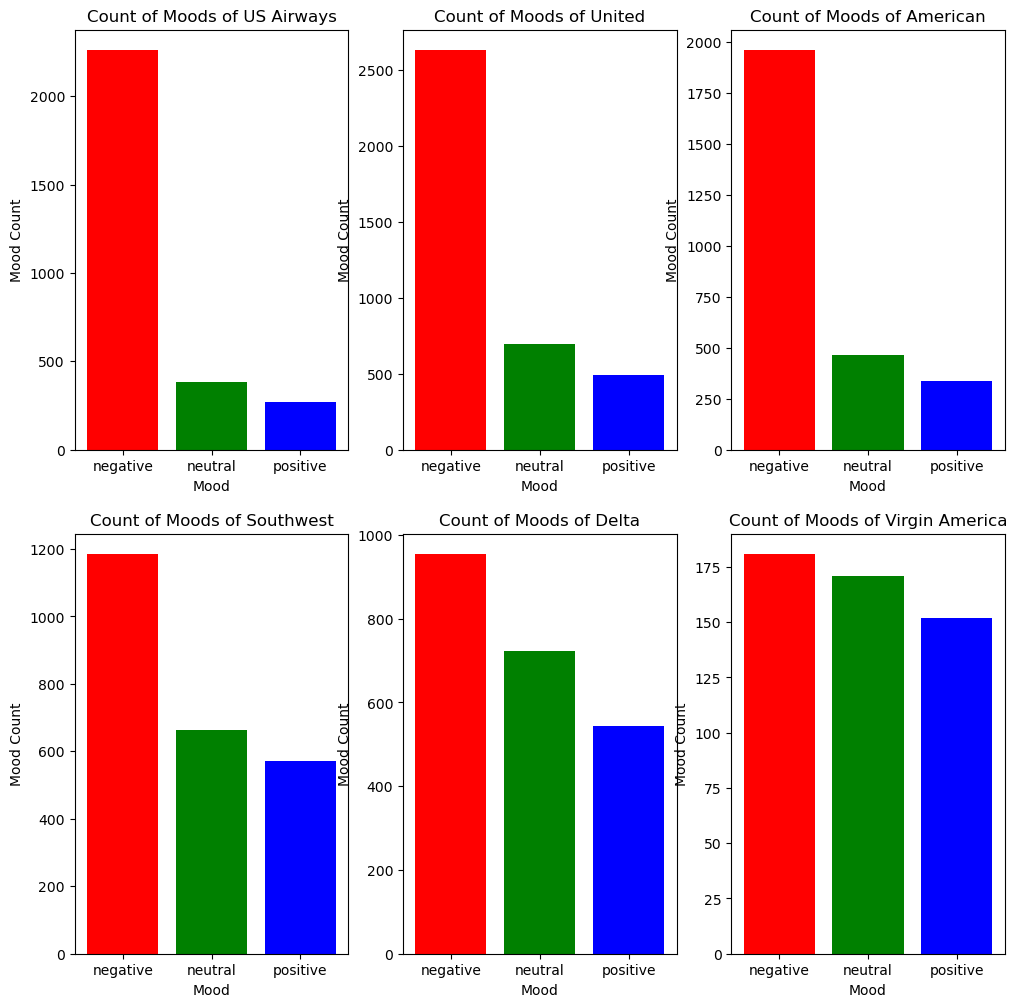

In [176]:
print("Total number of tweets for each airline \n ",tweet_df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airline2 = [1,2,3,4,5,6]
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airline2:
    indices= airline2.index(i)
    plt.subplot(2,3,indices+1)
    new_df=tweet_df[tweet_df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+str(airlines[i-1]))

Here we can see the amount of negative reviews are more, and hence it is contributing the maximum in the dataset. Hence lets see on the percentage of the negative reviews in more details

<Axes: xlabel='airline'>

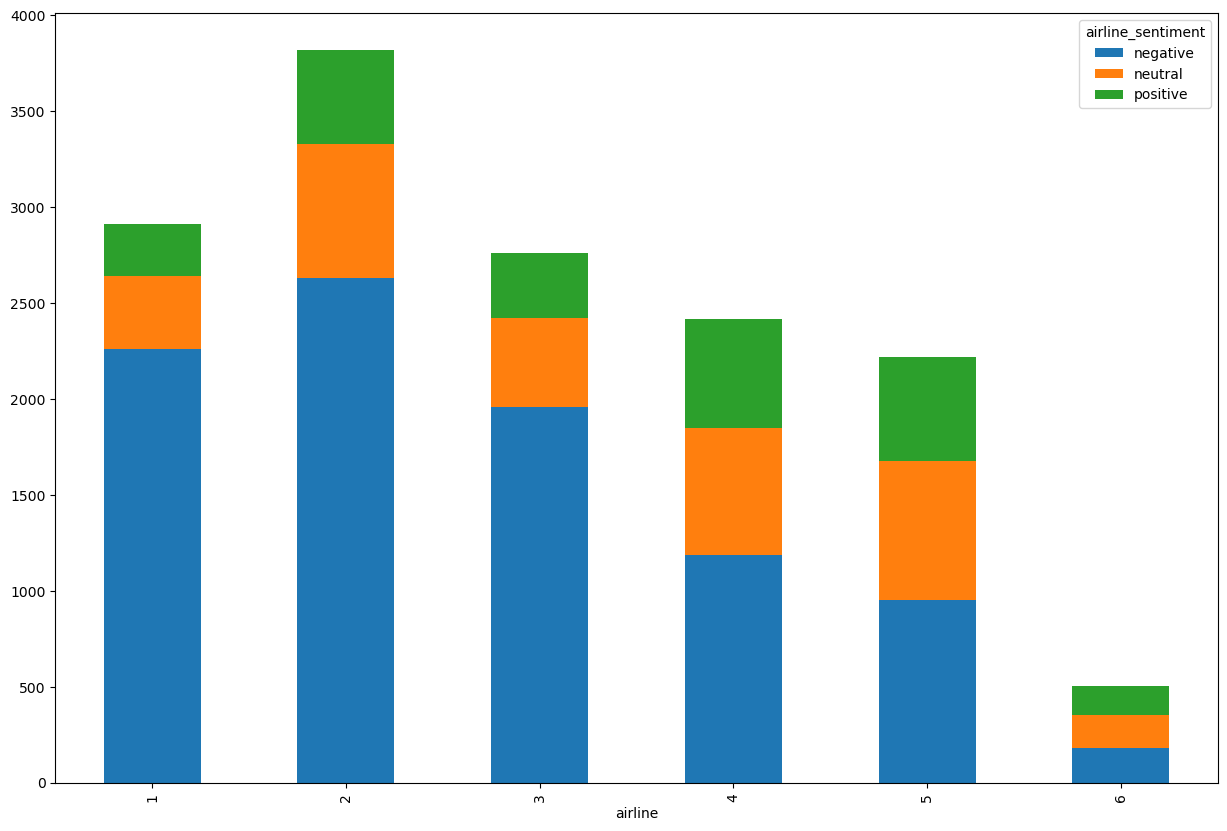

In [178]:
figure_2 = tweet_df.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(15,10))

Here we can see the domination is more of the negative and neutral tweets over the postive tweets

In [179]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

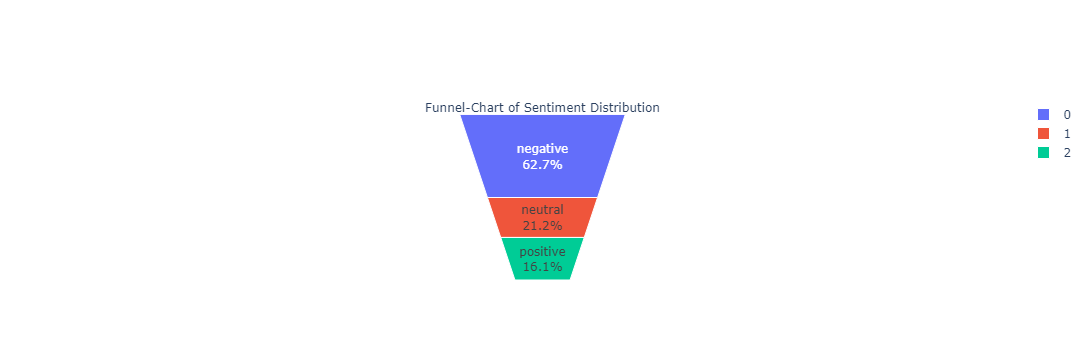

In [182]:
temp = tweet_df.groupby('airline_sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
fig = go.Figure(go.Funnelarea(
    text =temp.airline_sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [183]:
print(figure_2)

airline  airline_sentiment
1        negative             2263
         neutral               381
         positive              269
2        negative             2633
         neutral               697
         positive              492
3        negative             1960
         neutral               463
         positive              336
4        negative             1186
         neutral               664
         positive              570
5        negative              955
         neutral               723
         positive              544
6        negative              181
         neutral               171
         positive              152
dtype: int64


#### What are the general negative complains posted.

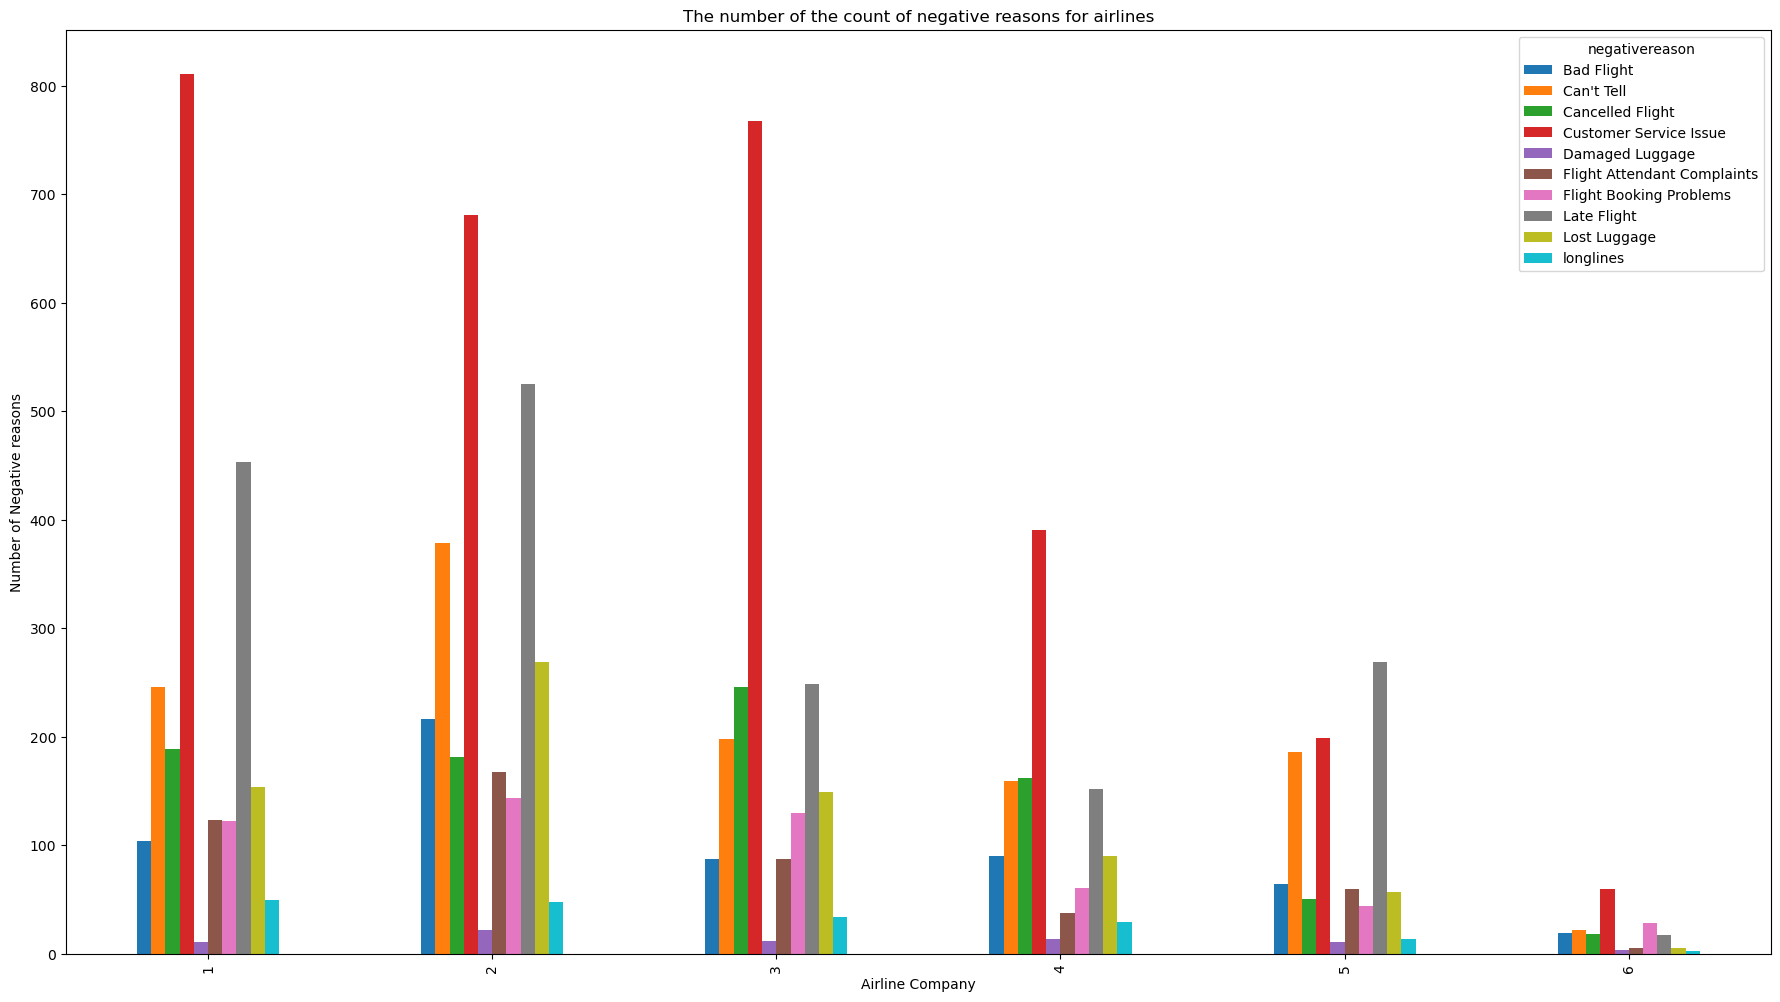

In [184]:
negative_reasons = tweet_df.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('Airline Company')
plt.ylabel('Number of Negative reasons')
plt.title("The number of the count of negative reasons for airlines")
plt.show()

In [185]:
tweet_df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

Here we can see there are 11 unique negative reasons

In [186]:
tweet_df['negativereason'].isnull().sum()

5462

As there are almost more than 5000+ null values we will map them with unkown.

In [187]:
# Step 1: Handle null values
tweet_df['negativereason'].fillna('Unknown', inplace=True)
tweet_df['negativereason'].isnull().sum()

C:\Users\chowd\AppData\Local\Temp\ipykernel_24248\830899971.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

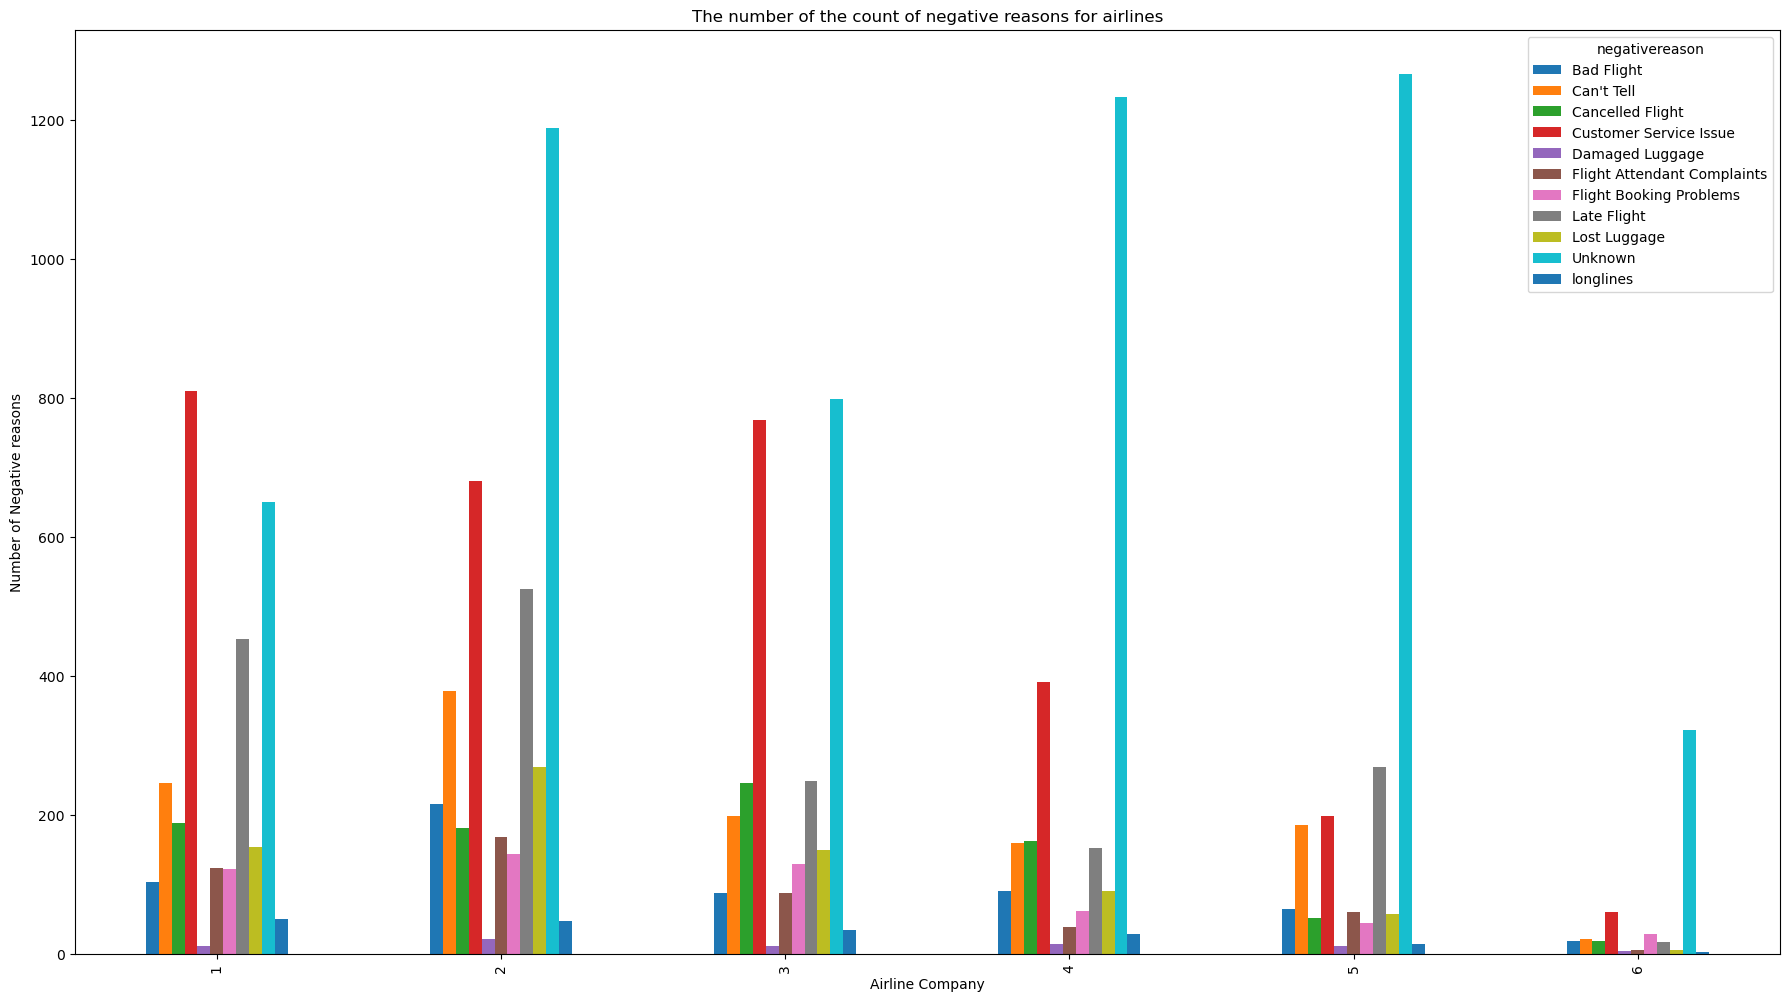

In [188]:
negative_reasons = tweet_df.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('Airline Company')
plt.ylabel('Number of Negative reasons')
plt.title("The number of the count of negative reasons for airlines")
plt.show()

#### Word Cloud for Negative Reasons

In [189]:
from wordcloud import WordCloud,STOPWORDS

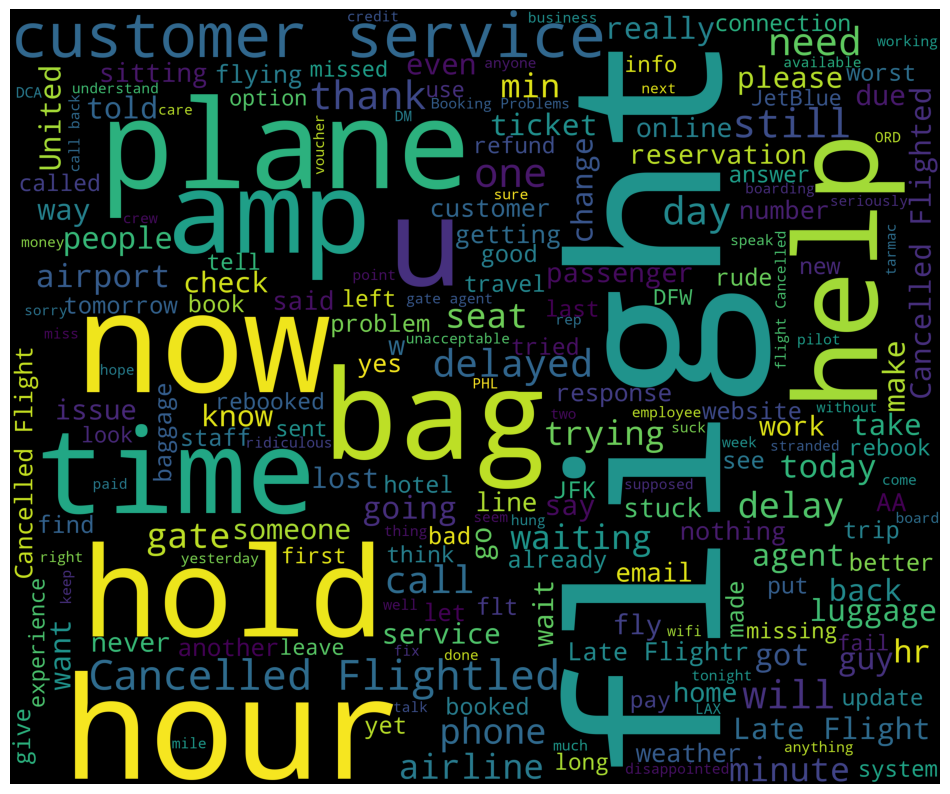

In [190]:
new_df=tweet_df[tweet_df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Word Cloud For Positive Reasons

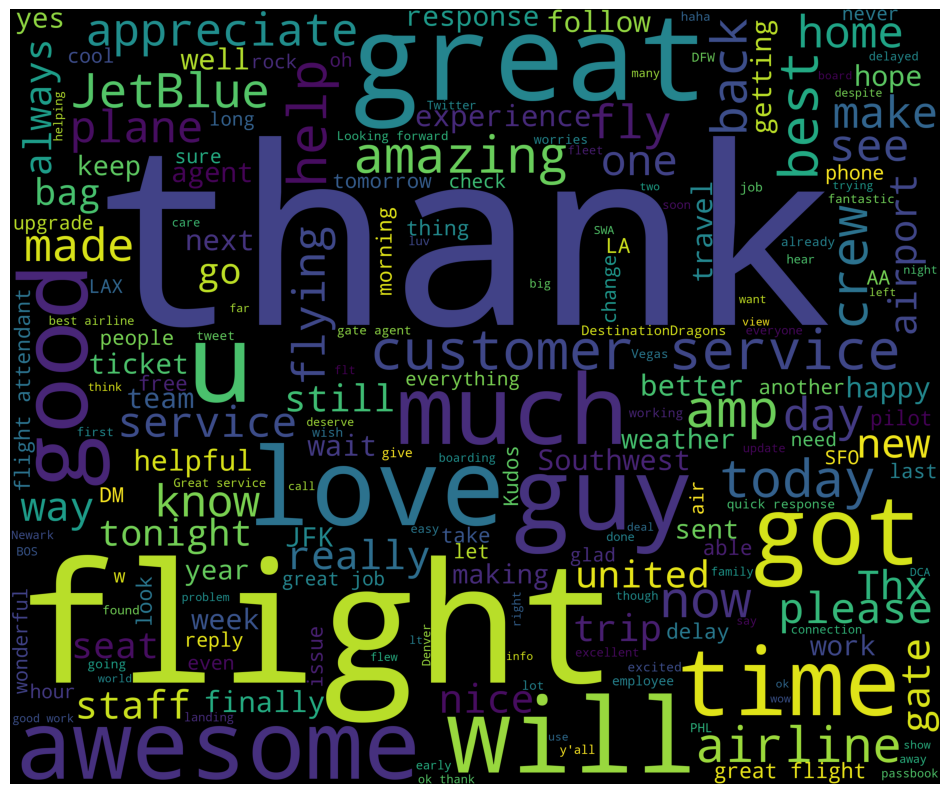

In [191]:
new_df=tweet_df[tweet_df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


On the entire analysis we found that neutral sentiments won't be required in this case. So we will be dropping the neutral sentiments

In [192]:
tweet_df.drop(tweet_df.loc[tweet_df['airline_sentiment']=='neutral'].index, inplace=True)
tweet_df['airline_sentiment'].unique()

array(['positive', 'negative'], dtype=object)

#### Encoding of Airline Sentiment

Here we will perform Label Encoding, for this field

In [193]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(tweet_df['airline_sentiment'])

tweet_df['airline_sentiment_encoded'] = le.transform(tweet_df['airline_sentiment'])
tweet_df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
1  5.703011e+17          positive                        0.3486   
3  5.703010e+17          negative                        1.0000   
4  5.703008e+17          negative                        1.0000   
5  5.703008e+17          negative                        1.0000   
6  5.703006e+17          positive                        0.6745   

  negativereason  negativereason_confidence  airline        name  \
1        Unknown                     0.0000        6    jnardino   
3     Bad Flight                     0.7033        6    jnardino   
4     Can't Tell                     1.0000        6    jnardino   
5     Can't Tell                     0.6842        6    jnardino   
6        Unknown                     0.0000        6  cjmcginnis   

   retweet_count                                               text  \
1              0  @VirginAmerica plus you've added commercials t...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   
5              0  @VirginAmerica seriously would pay $30 a fligh...   
6              0  @VirginAmerica yes, nearly every time I fly VX...   

                user_timezone  tweet_created_year  tweet_created_month  \
1  Pacific Time (US & Canada)                2015                    2   
3  Pacific Time (US & Canada)                2015                    2   
4  Pacific Time (US & Canada)                2015                    2   
5  Pacific Time (US & Canada)                2015                    2   
6  Pacific Time (US & Canada)                2015                    2   

   tweet_created_day  airline_sentiment_encoded  
1                 24                          1  
3                 24                          0  
4                 24                          0  
5                 24                          0  
6                 24                          1

In [194]:
#Now Drop Airline Sentiment
tweet_df = tweet_df.drop(['airline_sentiment'],axis =1)
tweet_df.head()

tweet_id  airline_sentiment_confidence negativereason  \
1  5.703011e+17                        0.3486        Unknown   
3  5.703010e+17                        1.0000     Bad Flight   
4  5.703008e+17                        1.0000     Can't Tell   
5  5.703008e+17                        1.0000     Can't Tell   
6  5.703006e+17                        0.6745        Unknown   

   negativereason_confidence  airline        name  retweet_count  \
1                     0.0000        6    jnardino              0   
3                     0.7033        6    jnardino              0   
4                     1.0000        6    jnardino              0   
5                     0.6842        6    jnardino              0   
6                     0.0000        6  cjmcginnis              0   

                                                text  \
1  @VirginAmerica plus you've added commercials t...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   
5  @VirginAmerica seriously would pay $30 a fligh...   
6  @VirginAmerica yes, nearly every time I fly VX...   

                user_timezone  tweet_created_year  tweet_created_month  \
1  Pacific Time (US & Canada)                2015                    2   
3  Pacific Time (US & Canada)                2015                    2   
4  Pacific Time (US & Canada)                2015                    2   
5  Pacific Time (US & Canada)                2015                    2   
6  Pacific Time (US & Canada)                2015                    2   

   tweet_created_day  airline_sentiment_encoded  
1                 24                          1  
3                 24                          0  
4                 24                          0  
5                 24                          0  
6                 24                          1

### Feature Engineering Text Data

Now we have to clean this text data and extract meaningful insights from it. We will be using basic NLP techniques likes Tokenization and Stop Words

In [195]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [196]:
nltk.download('stopwords')
tweet_df['clean_tweet']=tweet_df['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chowd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [197]:
tweet_df.head()

tweet_id  airline_sentiment_confidence negativereason  \
1  5.703011e+17                        0.3486        Unknown   
3  5.703010e+17                        1.0000     Bad Flight   
4  5.703008e+17                        1.0000     Can't Tell   
5  5.703008e+17                        1.0000     Can't Tell   
6  5.703006e+17                        0.6745        Unknown   

   negativereason_confidence  airline        name  retweet_count  \
1                     0.0000        6    jnardino              0   
3                     0.7033        6    jnardino              0   
4                     1.0000        6    jnardino              0   
5                     0.6842        6    jnardino              0   
6                     0.0000        6  cjmcginnis              0   

                                                text  \
1  @VirginAmerica plus you've added commercials t...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   
5  @VirginAmerica seriously would pay $30 a fligh...   
6  @VirginAmerica yes, nearly every time I fly VX...   

                user_timezone  tweet_created_year  tweet_created_month  \
1  Pacific Time (US & Canada)                2015                    2   
3  Pacific Time (US & Canada)                2015                    2   
4  Pacific Time (US & Canada)                2015                    2   
5  Pacific Time (US & Canada)                2015                    2   
6  Pacific Time (US & Canada)                2015                    2   

   tweet_created_day  airline_sentiment_encoded  \
1                 24                          1   
3                 24                          0   
4                 24                          0   
5                 24                          0   
6                 24                          1   

                                         clean_tweet  
1  virginamerica plus added commercials experienc...  
3  virginamerica really aggressive blast obnoxiou...  
4                 virginamerica really big bad thing  
5  virginamerica seriously would pay flight seats...  
6  virginamerica yes nearly every time fly vx ear...

Here we have came into consideration that we can only consider the clean_text field and the airline_sentiment_encoded for training the model.

## Creating x and y features


In [199]:
x = tweet_df.clean_tweet
y = tweet_df.airline_sentiment_encoded

print(len(x), len(y))

11541 11541


## Splitting Data into train_test

We are splitting the data into 80 to 20 percent

In [200]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8655 8655
2886 2886


## Vectorization of the fields

In [201]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [202]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [203]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

## Model Building using Support Vector Machines

In [204]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
#predicting output for test data
pred = model.predict(x_test_dtm)

In [205]:
#accuracy score
accuracy_score(y_test,pred)

0.9081774081774082

In [206]:
#building confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[2194,  129],
       [ 136,  427]], dtype=int64)

## Confusion Matrix

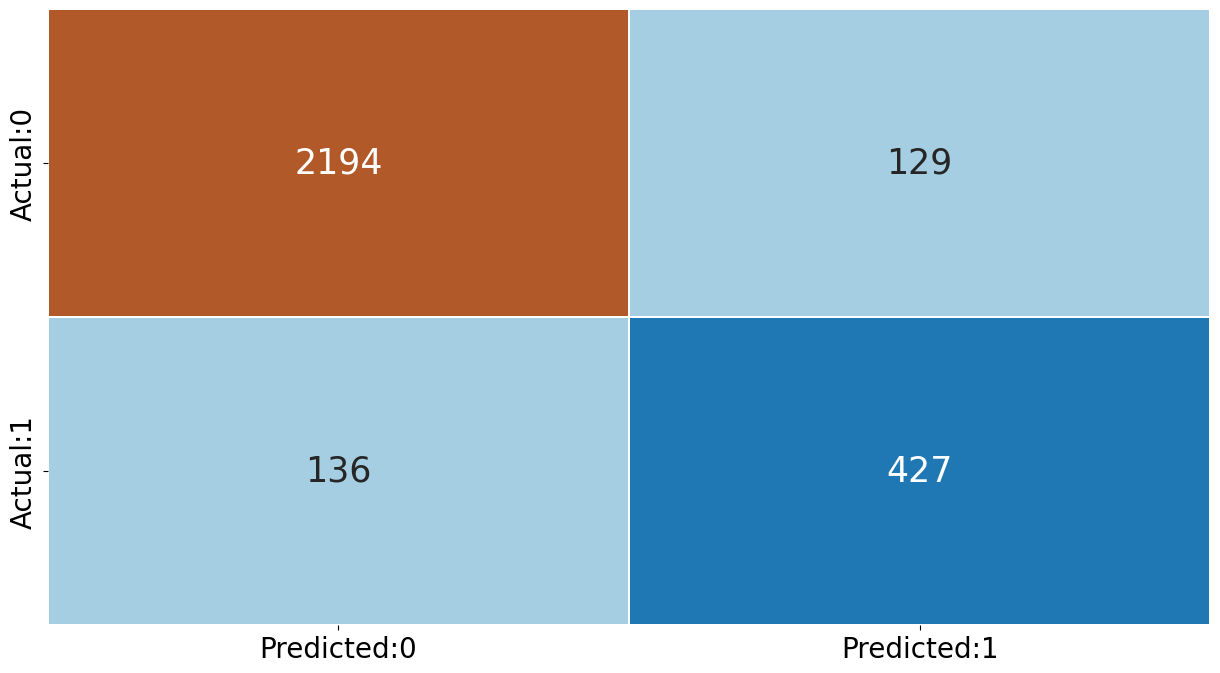

In [207]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [208]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2323
           1       0.77      0.76      0.76       563

    accuracy                           0.91      2886
   macro avg       0.85      0.85      0.85      2886
weighted avg       0.91      0.91      0.91      2886

